**B1: Tạo dữ liệu**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import glob
import cv2
import numpy as np

x_train = []
x_test = []
y_train = []
y_test = []

for train in glob.glob("/content/drive/MyDrive/1FacesWithANN/train/*.bmp"):
  a = cv2.imread(train)
  x_train.append(a)
  name0 = 'Phat'
  name1 = 'NguoiLa'
  if name0 in train:
    y_train.append([0])
  elif name1 in train:
    y_train.append([1])
x_train = np.array(x_train)
y_train = np.array(y_train)

for test in glob.glob("/content/drive/MyDrive/1FacesWithANN/test/*.bmp"):
  b = cv2.imread(test)
  x_test.append(b)
  name0 = 'Phat'
  name1 = 'NguoiLa'
  if name0 in train:
    y_test.append([0])
  elif name1 in train:
    y_test.append([1])
x_test = np.array(x_test)
y_test = np.array(y_test)

In [ ]:
print(y_train)
print(y_test)

[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]


**Test show ảnh train và y_train**

[0]


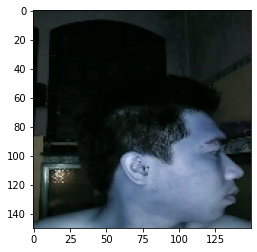

In [5]:
import matplotlib.pyplot as plt
plt.imshow(x_test[3])
print(y_test[3])

In [6]:
print(x_train.shape)
print(y_train.shape)
print(y_test.shape)
print(x_test.shape)

(443, 150, 150, 3)
(443, 1)
(9, 1)
(9, 150, 150, 3)


**B2: Chuẩn hoá dữ liệu**

In [7]:
from keras.utils.np_utils import to_categorical

x_train = x_train.reshape(443, 67500)
x_test = x_test.reshape(9, 67500)
# Chuyen don vi mau thanh so thuc
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Chuyen anh trang den
x_train /= 255
x_test /= 255

# ...to_categorical(y_train, 2) với 2: số phần tử output
y_train = to_categorical(y_train, 2)
y_test = to_categorical(y_test, 2)

In [8]:
from tensorflow.keras.optimizers import RMSprop
from keras.layers import Dense, Activation, BatchNormalization, Dropout
from keras.models import Sequential
model = Sequential()
model.add(Dense(512, kernel_initializer='normal', activation='relu', input_shape=(67500,)))
model.add(Dense(512, activation='relu'))
# model.add(Dropout(0.2))
# model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(2, activation='softmax')) 
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               34560512  
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 2)                 1026      
                                                                 
Total params: 34,824,194
Trainable params: 34,824,194
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.compile(loss='categorical_crossentropy', optimizer=RMSprop(), metrics=['accuracy'])
history = model.fit(x_train, y_train, batch_size=32, epochs=10, verbose=1, validation_data=(x_test, y_test))  
#verbose = 0: trong qua trinh hoc ko hien thi ra man hinh, = 1: hien thi ..., = 2: hien thi 1/500:..., 2/500:...

Epoch 1/10
14/14 [==============================] - 5s 321ms/step - loss: 85.5926 - accuracy: 0.5553 - val_loss: 12.5184 - val_accuracy: 0.3333
Epoch 2/10
14/14 [==============================] - 4s 304ms/step - loss: 7.2328 - accuracy: 0.7336 - val_loss: 11.1432 - val_accuracy: 0.3333
Epoch 3/10
14/14 [==============================] - 4s 303ms/step - loss: 1.0354 - accuracy: 0.9233 - val_loss: 8.3496 - val_accuracy: 0.6667
Epoch 4/10
14/14 [==============================] - 4s 309ms/step - loss: 2.0093e-04 - accuracy: 1.0000 - val_loss: 7.9245 - val_accuracy: 0.6667
Epoch 5/10
14/14 [==============================] - 5s 339ms/step - loss: 2.8916e-04 - accuracy: 1.0000 - val_loss: 7.2769 - val_accuracy: 0.6667
Epoch 6/10
14/14 [==============================] - 5s 361ms/step - loss: 1.2038e-04 - accuracy: 1.0000 - val_loss: 8.3032 - val_accuracy: 0.6667
Epoch 7/10
14/14 [==============================] - 4s 313ms/step - loss: 2.8701e-04 - accuracy: 1.0000 - val_loss: 8.6696 - val_accu

In [10]:
model.save('/content/drive/MyDrive/1FacesWithANN/1FaceswithANN.h5')

**Đọc ảnh custom**

(150, 150, 3)


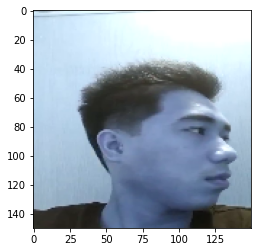

In [11]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread(r'/content/drive/MyDrive/1FacesWithANN/test/Phat_0344.bmp')
plt.imshow(img)
img_re = cv2.resize(img, (150, 150))
plt.imshow(img_re)
print(img_re.shape)

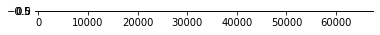

In [12]:
x_test_c = img_re.reshape(1, 67500) 
x_test_c = x_test_c.astype('float32')
x_test_c /= 255
plt.imshow(x_test_c)

**Tiên đoán**

In [13]:
y_pred = model.predict(x_test_c)
print(y_pred)

[[1.000000e+00 8.579071e-09]]


In [14]:
y_pred = model.predict(x_test)
print(y_pred)

[[1.5954778e-05 9.9998403e-01]
 [7.3013666e-07 9.9999928e-01]
 [4.2959160e-05 9.9995708e-01]
 [1.0000000e+00 2.2066064e-12]
 [1.0000000e+00 3.1631876e-16]
 [1.0000000e+00 2.3778971e-19]
 [1.0000000e+00 8.5787759e-09]
 [9.9999964e-01 3.1396806e-07]
 [1.0000000e+00 6.1892518e-09]]


In [15]:
score = model.evaluate(x_test, y_pred, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 7.593908958369866e-05
Test accuracy: 1.0


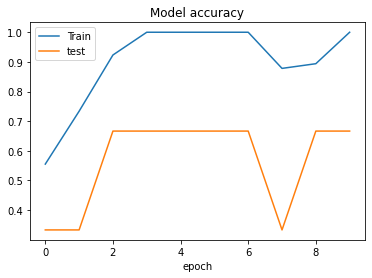

In [16]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'test'], loc='upper left')
plt.show()

In [18]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model

img = load_img('/content/drive/MyDrive/1FacesWithANN/test/Phat_0344.bmp', target_size=(150, 150))
img = img_to_array(img)
img = img.reshape(1, 67500)
img = img.astype('float32')
img = img / 255.0


# load model
model_final = load_model('/content/drive/MyDrive/1FacesWithANN/1FaceswithANN.h5')
# predict the class
result = model.predict(img)
print('Giá trị dự đoán:', np.argmax(result))
if np.argmax(result) == 0:
   print("Chính là Phát đấy")
elif np.argmax(result) == 1:
  print("Không phải Phát đâu:>")
plt.show()

Giá trị dự đoán: 0
Chính là Phát đấy
